# Resample Time Series Data

Use this template to help you resample time series data. Resampling is useful when you want to change the frequency of your data or when you want to analyze it under a different resolution. This template covers both downsampling (reducing the frequency of time series data) and upsampling (increasing the frequency of time series data).

To swap in your dataset in this template, the following is required:
- You must have a dataset with a date column that can be parsed by pandas. This is checked in the code, and if you encounter difficulties, you can consult the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) for further assistance.
- You must have at least one variable that you are interested in analyzing (e.g., price, sales, etc).

The placeholder dataset in this template is Nvidia stock price data, containing the closing price on each trading day.

In [1]:
# Load packages
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme and settings for future plots
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 80

## Setting Up Your Data

Before you begin, you will want to set up your data correctly. The [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function from pandas offers several arguments that make working with time series easier from the start:
- `index_col` will allow you to immediately set the date as the index, allowing easier manipulations afterward.
- `parse_dates` instructs pandas to parse the index as a date if possible.

You can then slice the DataFrame to select the dates/times you are most interested in using. You can read more about time series and date functionality within pandas [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#slice-vs-exact-match). The string you use to slice the DataFrame can be a partial match or a full match.

In [2]:
# Column to use as the date
date_col = "Date"

# Replace with the file you want to use and load your dataset into a DataFrame
df = pd.read_csv("nvda.csv", index_col=date_col, parse_dates=True)

# Check that the index is correctly converted to a date
print("The index been parsed as a date: " + str(is_datetime(df.index)))

The index been parsed as a date: True


If the code above returns `False`, then you will need to use pandas' [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function to correctly set the index to a date.

Next, you can specify the variable of interest and choose a date range.

In [3]:
# Replace this with the name of the column you want to analyze
var_col = "Close"

# Reduce the DataFrame down to the relevant columns
df_subset = df[[var_col]] 

# Select the date range you want to explore
df_time = df_subset[
    "2020-1-1":"2021-1-1"  # Pass in the date ranges you are interested in here
].copy()

# Preview the DataFrame
df_time

,Close
Date,
2020-01-02,59.977501
2020-01-03,59.017502
2020-01-06,59.264999
2020-01-07,59.982498
2020-01-08,60.095001
...,...
2020-12-24,129.937500
2020-12-28,129.000000
2020-12-29,129.432495


## Downsampling data

Downsampling takes data at high frequency and reduces it to a lower frequency. An example of this would be converting daily data to monthly data. Downsampling returns more data points than there are periods. Most often, you will want to perform an aggregation. 

You can downsample data with the pandas [`.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method. You will need to do two things:
- Choose the new frequency. This example downsamples daily data to weekly ("W") and monthly ("M") data. You can read more about date offset aliases [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).
- Use an appropriate aggregation function. In this example, [`.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) is used. However, there are many different aggregation functions available, including [`.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html), [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html), [`.max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html), [`.min()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), [`first()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.first.html), and [`last()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last.html).

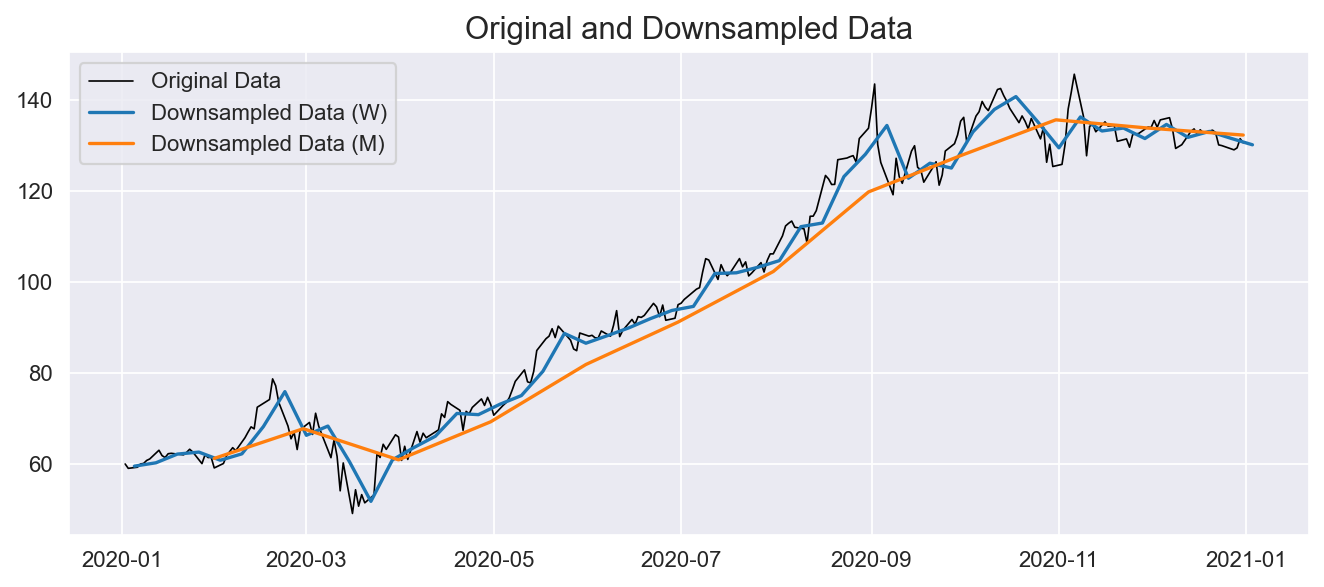

In [4]:
# Set your downsampling periods here
downsample_one = "W"
downsample_two = "M"

# Create a new DataFrame by downsampling with the first downsample period
df_downsample_one = df_time.resample(downsample_one).mean().copy()

# Create a new DataFrame by downsampling with the second downsample period
df_downsample_two = df_time.resample(downsample_two).mean().copy()

# Plot all three DataFrames
plt.plot(
    df_time.index,
    df_time[var_col],
    label="Original Data",
    color="black",
    linewidth=0.75,
)
plt.plot(
    df_downsample_one.index,
    df_downsample_one[var_col],
    label="Downsampled Data " + f"({downsample_one})",
)
plt.plot(
    df_downsample_two.index,
    df_downsample_two[var_col],
    label="Downsampled Data " + f"({downsample_two})",
)

# Initialize a legend
plt.legend()

# Set the plot title
plt.title("Original and Downsampled Data", fontsize=14)

# Show the plot
plt.show()

## Upsampling data

Upsampling takes data at a low frequency and increases it to a higher frequency. An example of this would be converting daily data to hourly data. Unlike downsampling, upsampling will leave you with empty data points that you will probably want to fill. This template covers a variety of ways you can handle this.

The example starts by using [`.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again to convert the time series to the new frequency (again, you can read more about date offset aliases [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)).  [`.asfreq()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html) is then used to return the DataFrame without any grouping.

In [5]:
# Set your upsampling period here
upsample = "H"

# Create an example DataFrame for upsampling demonstration
df_time_subset = df_time["2020-01-01":"2020-01-31"]

# Create a new DataFrame by upsampling the example DataFrame
df_upsample = df_time_subset.resample(upsample).asfreq()

# Preview the upsampled DataFrame
df_upsample

,Close
Date,
2020-01-02 00:00:00,59.977501
2020-01-02 01:00:00,NaN
2020-01-02 02:00:00,NaN
2020-01-02 03:00:00,NaN
2020-01-02 04:00:00,NaN
...,...
2020-01-30 20:00:00,NaN
2020-01-30 21:00:00,NaN
2020-01-30 22:00:00,NaN


Notice how the column of interest has missing values. In the following code three techniques are used to create new columns that fill the missing data with [.`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html):
- [`.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.fillna.html) can fill missing values in a variety of ways. In this example the "nearest" value is used.
- [`.ffill()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.ffill.html#pandas.core.resample.Resampler.ffill) forward fills all missing values from the last valid data point. Although not shown, [`.bfill()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.ffill.html#pandas.core.resample.Resampler.bfill) performs the reverse operation.
- [`.interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.interpolate.html) interpolates the values between data points. By default, this will fill the missing values with evenly spaced values between existing data points.

You can see how each fill method works by reviewing the plot shown below.

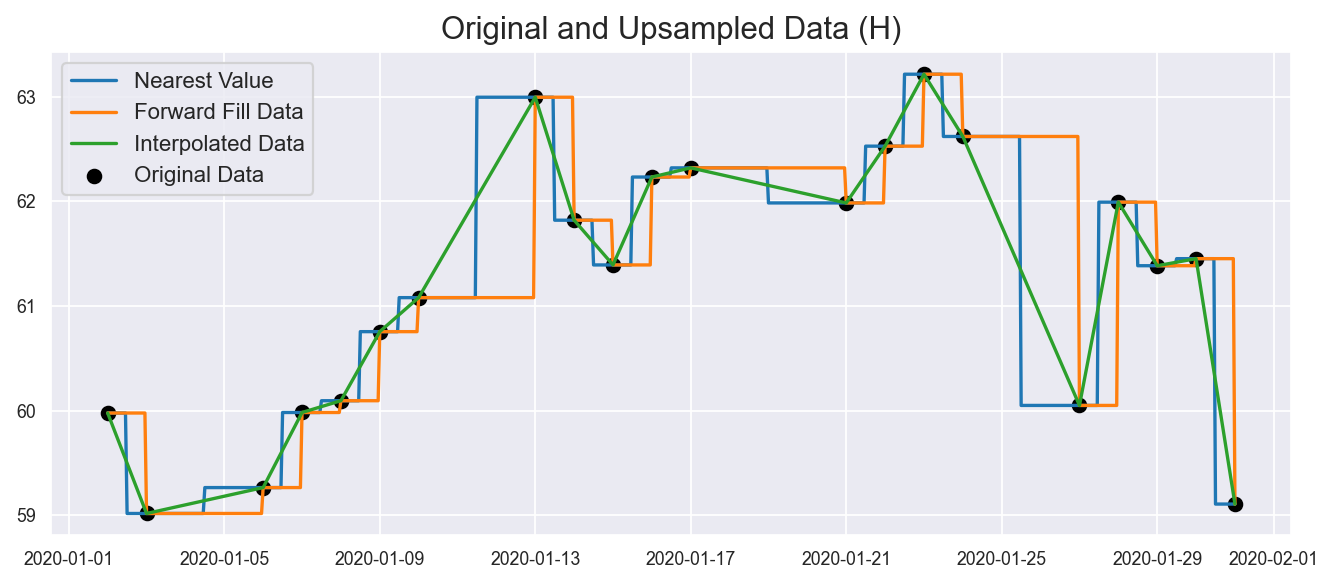

In [6]:
# Upsample and fill missing values with a given value
df_upsample["nearest_value"] = df_time_subset.resample(upsample).fillna("nearest")

# Upsample and fill missing values with a forward fill
df_upsample["forward_fill"] = df_time_subset.resample(upsample).ffill()

# Upsample and fill missing values with interpolation
df_upsample["interpolate"] = df_time_subset.resample(upsample).interpolate()

# Plot the original data and three of the upsampling methods
plt.scatter(
    df_upsample.index, df_upsample[var_col], label="Original Data", color="black"
)
plt.plot(df_upsample.index, df_upsample["nearest_value"], label="Nearest Value")
plt.plot(df_upsample.index, df_upsample["forward_fill"], label="Forward Fill Data")
plt.plot(df_upsample.index, df_upsample["interpolate"], label="Interpolated Data")

# Initialize a legend
plt.legend()

# Set the plot title and format labels
plt.title("Original and Upsampled Data " + f"({upsample})", fontsize=14)
plt.xticks(size=8)
plt.yticks(size=8)

# Show the plot
plt.show()

If you're interested in further time series manipulations with Python, be sure to check out the course [Manipulating Time Series Data in Python](https://app.datacamp.com/learn/courses/manipulating-time-series-data-in-python). The skills taught in this course also prepare you for more advanced operations with time series data, including [Time Series Analysis in Python](https://app.datacamp.com/learn/courses/time-series-analysis-in-python) and [Machine Learning for Time Series Data in Python](https://app.datacamp.com/learn/courses/machine-learning-for-time-series-data-in-python).